<a href="https://colab.research.google.com/github/mazak-patra/ALGO/blob/main/searching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Searching
Implement Linear Search. Determine the time required to search for element. Repeat the experiment for different values of n, the number of elements in the list to besearched and plot a graph of the time taken versus n.

- To implement Linear Search, measure its time complexity for searching an element, vary the input size by changing the number of elements in the list, and plot a graph to visualize the relationship between time taken and input size
- Algorithm:  
1. Start with the first element of the list.
2. Compare the element with the value being searched for.
3. If the element matches, return the index.
4. If the element does not match, move to the next element and repeat steps 2-3.
5. If the end of the list is reached and no match is found, return -1

- **Created by Dr. Ajay

In [13]:
# write code for Linear Search and plot a graph to visualize the relationship between time taken and input size


Running experiments for Linear Search...
n=100: Target Present Time = 0.0039 ms, Target Absent Time = 0.0039 ms
n=500: Target Present Time = 0.0173 ms, Target Absent Time = 0.0210 ms
n=1000: Target Present Time = 0.0054 ms, Target Absent Time = 0.0411 ms
n=2000: Target Present Time = 0.0633 ms, Target Absent Time = 0.0820 ms
n=5000: Target Present Time = 0.1697 ms, Target Absent Time = 0.2375 ms
n=10000: Target Present Time = 0.1088 ms, Target Absent Time = 0.7086 ms
n=20000: Target Present Time = 0.2595 ms, Target Absent Time = 0.9538 ms
n=50000: Target Present Time = 2.5497 ms, Target Absent Time = 2.4565 ms
n=100000: Target Present Time = 0.8235 ms, Target Absent Time = 5.6630 ms


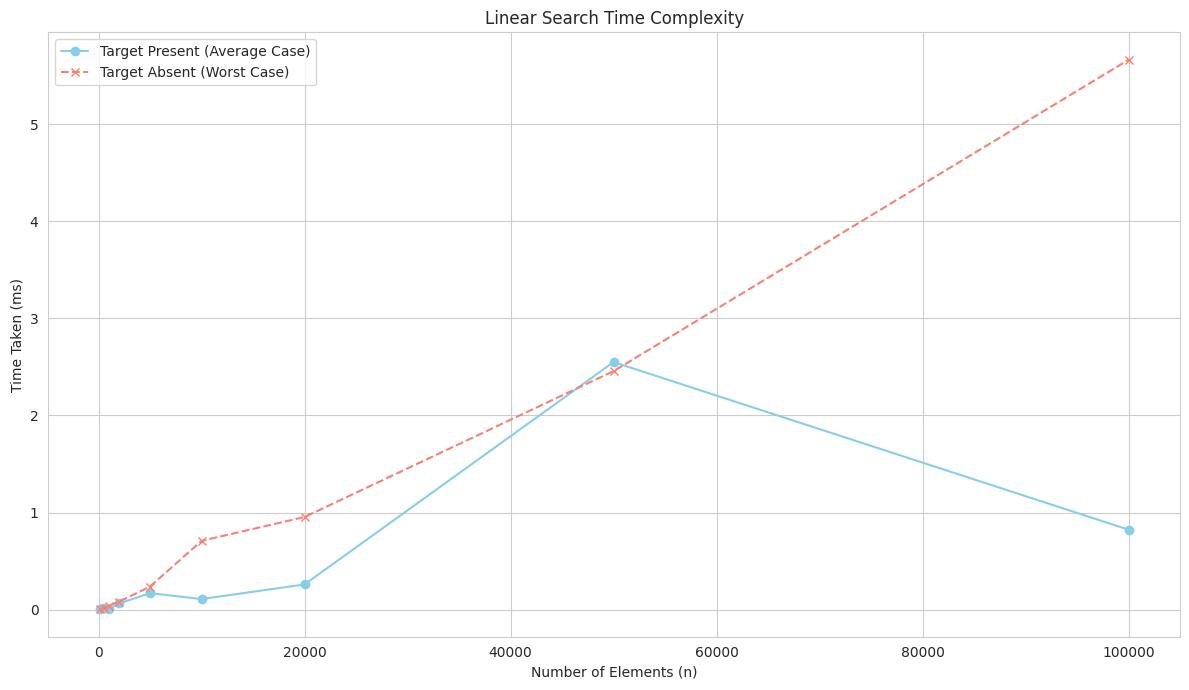

In [14]:
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns

def linear_search(arr, target):
    """Implements the Linear Search algorithm."""
    for i in range(len(arr)):
        if arr[i] == target:
            return i  # Element found, return its index
    return -1  # Element not found

def measure_time(search_func, arr_size, target_present):
    """Measures the time taken to search an element in an array of given size."""
    arr = [random.randint(0, arr_size * 2) for _ in range(arr_size)]

    # Ensure the target is present or not present based on the flag
    if target_present:
        target = arr[random.randint(0, arr_size - 1)] # Target is an existing element
    else:
        target = arr_size * 3 # Target is definitely not in the array

    start_time = time.perf_counter()
    search_func(arr, target)
    end_time = time.perf_counter()
    return (end_time - start_time) * 1000 # Return time in milliseconds

# Experiment setup
n_values = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
times_present = []
times_absent = []

print("Running experiments for Linear Search...")
for n in n_values:
    # Measure time when target is present
    time_p = measure_time(linear_search, n, target_present=True)
    times_present.append(time_p)

    # Measure time when target is absent (worst case)
    time_a = measure_time(linear_search, n, target_present=False)
    times_absent.append(time_a)
    print(f"n={n}: Target Present Time = {time_p:.4f} ms, Target Absent Time = {time_a:.4f} ms")

# Plotting the results
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

plt.plot(n_values, times_present, marker='o', linestyle='-', color='skyblue', label='Target Present (Average Case)')
plt.plot(n_values, times_absent, marker='x', linestyle='--', color='salmon', label='Target Absent (Worst Case)')

plt.title('Linear Search Time Complexity')
plt.xlabel('Number of Elements (n)')
plt.ylabel('Time Taken (ms)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. Searching
Implement recursive Binary Search. Determine the time required to search an element.Repeat the experiment for different values of n, the number of elements in the list to besearched and plot a graph of the time taken versus n.
- implement recursive Binary Search, measure its time complexity for searching an element and plot a graph of time taken versus different values of n, the number of elements in the list.  
Algorithm:
1. Start with the middle element of the list
2. If the middle element matches the element being searched, return the index of the middle element
3. If the middle element is greater than the element being searched, recursively call the function on the left half of the list
4. If the middle element  is  less than the element  being searched, recursively call the function on the right half of the list
5. If the element is not found, return -1

In [15]:
#Prob_2: write code for recursive Binary Search and plot a graph to visualize the relationship between time taken and input size

Running experiments for Recursive Binary Search...
n=100: Target Present Time = 0.0039 ms, Target Absent Time = 0.0024 ms
n=500: Target Present Time = 0.0042 ms, Target Absent Time = 0.0038 ms
n=1000: Target Present Time = 0.0040 ms, Target Absent Time = 0.0049 ms
n=2000: Target Present Time = 0.0049 ms, Target Absent Time = 0.0042 ms
n=5000: Target Present Time = 0.0081 ms, Target Absent Time = 0.0121 ms
n=10000: Target Present Time = 0.0061 ms, Target Absent Time = 0.0053 ms
n=20000: Target Present Time = 0.0072 ms, Target Absent Time = 0.0061 ms
n=50000: Target Present Time = 0.0069 ms, Target Absent Time = 0.0202 ms
n=100000: Target Present Time = 0.0310 ms, Target Absent Time = 0.0128 ms


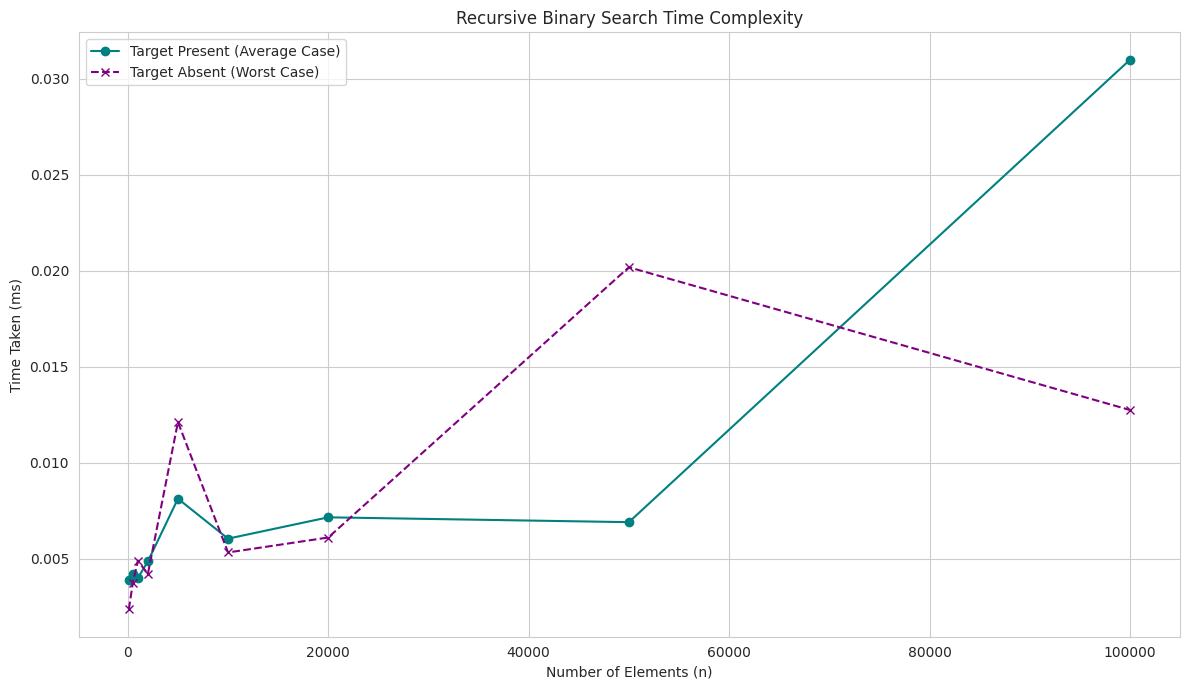

In [16]:
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns

def binary_search_recursive(arr, target, low, high):
    """Implements the recursive Binary Search algorithm."""
    if low > high:
        return -1  # Element not found

    mid = (low + high) // 2

    if arr[mid] == target:
        return mid  # Element found
    elif arr[mid] > target:
        return binary_search_recursive(arr, target, low, mid - 1)
    else:
        return binary_search_recursive(arr, target, mid + 1, high)

def measure_time_binary(search_func, arr_size, target_present):
    """Measures the time taken to search an element in a sorted array of given size."""
    arr = sorted([random.randint(0, arr_size * 2) for _ in range(arr_size)]) # Binary search requires a sorted array

    if target_present:
        target = arr[random.randint(0, arr_size - 1)] # Target is an existing element
    else:
        # Ensure target is not in the array. Choose a value outside the array's min/max range, or an intermediate value not present.
        # For simplicity, choosing a value significantly outside the range.
        target = arr_size * 3 + 1 # Target is highly likely not in the array
        if arr_size > 0: # Ensure target is truly absent if it accidentally falls within min/max
            while target >= arr[0] and target <= arr[-1]:
                target = random.randint(arr[-1] + 1, arr[-1] + arr_size)


    start_time = time.perf_counter()
    search_func(arr, target, 0, len(arr) - 1)
    end_time = time.perf_counter()
    return (end_time - start_time) * 1000 # Return time in milliseconds

# Experiment setup
n_values = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
times_present_binary = []
times_absent_binary = []

print("Running experiments for Recursive Binary Search...")
for n in n_values:
    # Measure time when target is present
    time_p = measure_time_binary(binary_search_recursive, n, target_present=True)
    times_present_binary.append(time_p)

    # Measure time when target is absent (worst case)
    time_a = measure_time_binary(binary_search_recursive, n, target_present=False)
    times_absent_binary.append(time_a)
    print(f"n={n}: Target Present Time = {time_p:.4f} ms, Target Absent Time = {time_a:.4f} ms")

# Plotting the results
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

plt.plot(n_values, times_present_binary, marker='o', linestyle='-', color='teal', label='Target Present (Average Case)')
plt.plot(n_values, times_absent_binary, marker='x', linestyle='--', color='purple', label='Target Absent (Worst Case)')

plt.title('Recursive Binary Search Time Complexity')
plt.xlabel('Number of Elements (n)')
plt.ylabel('Time Taken (ms)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Prob-3
Given a text txt [0...n-1] and a pattern pat [0...m-1], write a function search (char pat [ ],char txt [ ]) that prints all occurrences of pat [ ] in txt [ ]. You may assume that n > m.
- Aim:  To write a function "search" that takes a pattern and a text as input, and outputs all occurrences of the pattern in the text.  Algorithm:
1. Initialize an empty list to store the indices where the pattern occurs in the text.
2. Loop through each character in the text. For each character, check if the substring starting at that character matches the pattern.
3. If there is a match, append the starting index of the substring to the list of occurrences.
4. Continue looping through the text until all possible substrings have been checked.
5. Return the list of indices where the pattern occurs in the text.  




In [17]:
#write code for Prob-3

In [18]:
def search(pat, txt):
    """Prints all occurrences of pat[] in txt[]."""
    M = len(pat)
    N = len(txt)
    occurrences = []

    # A loop to slide pat[] one by one
    for i in range(N - M + 1):
        j = 0

        # For current index i, check for pattern match
        while j < M:
            if txt[i + j] != pat[j]:
                break
            j += 1

        if j == M: # if pat[0...M-1] = txt[i...i+M-1]
            occurrences.append(i)
    return occurrences

# Test cases
print("--- Test Case 1 ---")
txt1 = "AABAACAADAABAABA"
pat1 = "AABA"
res1 = search(pat1, txt1)
print(f"Text: '{txt1}'")
print(f"Pattern: '{pat1}'")
print(f"Pattern found at indices: {res1}") # Expected: [0, 9, 12]

print("\n--- Test Case 2 ---")
txt2 = "GEEKSFORGEEKS"
pat2 = "GEEK"
res2 = search(pat2, txt2)
print(f"Text: '{txt2}'")
print(f"Pattern: '{pat2}'")
print(f"Pattern found at indices: {res2}") # Expected: [0, 9]

print("\n--- Test Case 3 ---")
txt3 = "AAAAA"
pat3 = "AAA"
res3 = search(pat3, txt3)
print(f"Text: '{txt3}'")
print(f"Pattern: '{pat3}'")
print(f"Pattern found at indices: {res3}") # Expected: [0, 1, 2]

print("\n--- Test Case 4 ---")
txt4 = "ABCDEFG"
pat4 = "XYZ"
res4 = search(pat4, txt4)
print(f"Text: '{txt4}'")
print(f"Pattern: '{pat4}'")
print(f"Pattern found at indices: {res4}") # Expected: []


--- Test Case 1 ---
Text: 'AABAACAADAABAABA'
Pattern: 'AABA'
Pattern found at indices: [0, 9, 12]

--- Test Case 2 ---
Text: 'GEEKSFORGEEKS'
Pattern: 'GEEK'
Pattern found at indices: [0, 8]

--- Test Case 3 ---
Text: 'AAAAA'
Pattern: 'AAA'
Pattern found at indices: [0, 1, 2]

--- Test Case 4 ---
Text: 'ABCDEFG'
Pattern: 'XYZ'
Pattern found at indices: []


#Prob-4
Sort a given set of elements using the Insertion sort and determine the time required tosort the elements. Repeat the experiment for different values of n, the number of elements in the list to be sorted and plot a graph of the time taken versus n.  
- Aim :  To Develop a program to implement Insertion sort and determine the time required to sort the elements.  
- Algorithm:  
1. Iterate over the array from the second element to the end (i = 1 to n-1).
2. For each element, compare it to the elements before it (j = i-1 to 0).
3. If the current element is smaller, swap it with the element before it.
4. Repeat step 3 until the current element is no longer smaller than the previous element.
5. Repeat steps 2-4 for all elements in the array.

In [19]:
#Prob_4: write code for insertion sort and plot a graph to visualize the relationship between time taken and input size

Running experiments for Insertion Sort...
n=100: Random = 0.1836 ms, Sorted = 0.0105 ms, Reverse = 0.3425 ms
n=500: Random = 5.0046 ms, Sorted = 0.0535 ms, Reverse = 9.5946 ms
n=1000: Random = 26.1770 ms, Sorted = 0.1149 ms, Reverse = 44.9682 ms
n=2000: Random = 102.0199 ms, Sorted = 0.2459 ms, Reverse = 209.0343 ms
n=5000: Random = 626.5357 ms, Sorted = 0.6210 ms, Reverse = 2225.9788 ms
n=10000: Random = 2828.1734 ms, Sorted = 1.2488 ms, Reverse = 5095.9343 ms


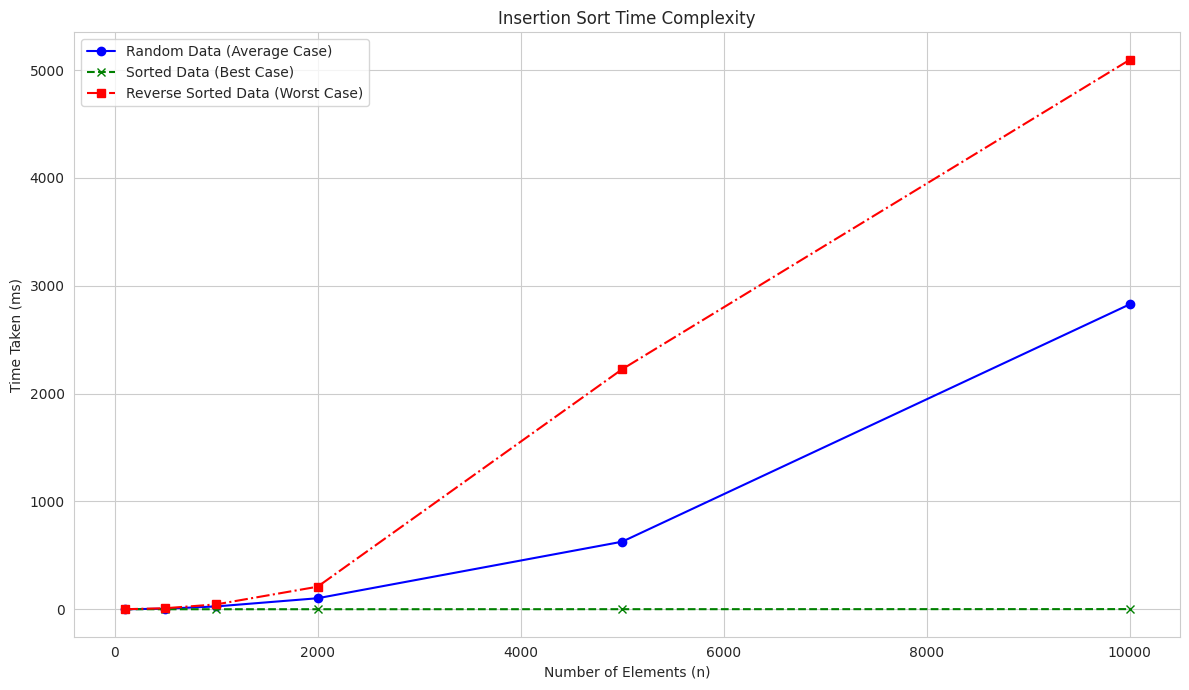

In [20]:
import time
import random
import matplotlib.pyplot as plt
import seaborn as sns

def insertion_sort(arr):
    """Implements the Insertion Sort algorithm."""
    n = len(arr)
    for i in range(1, n):
        key = arr[i]
        j = i - 1
        # Move elements of arr[0..i-1], that are greater than key,
        # to one position ahead of their current position
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

def measure_time_sort(sort_func, arr_size, sort_order='random'):
    """Measures the time taken to sort an array of given size."""
    if sort_order == 'random':
        arr = [random.randint(0, arr_size * 10) for _ in range(arr_size)]
    elif sort_order == 'sorted':
        arr = sorted([random.randint(0, arr_size * 10) for _ in range(arr_size)])
    elif sort_order == 'reverse':
        arr = sorted([random.randint(0, arr_size * 10) for _ in range(arr_size)], reverse=True)
    else:
        raise ValueError("sort_order must be 'random', 'sorted', or 'reverse'")

    start_time = time.perf_counter()
    sort_func(list(arr)) # Pass a copy to ensure original array is not modified across runs
    end_time = time.perf_counter()
    return (end_time - start_time) * 1000 # Return time in milliseconds

# Experiment setup
n_values = [100, 500, 1000, 2000, 5000, 10000]
times_random = []
times_sorted = []
times_reverse = []

print("Running experiments for Insertion Sort...")
for n in n_values:
    # Measure time for random data
    time_rand = measure_time_sort(insertion_sort, n, sort_order='random')
    times_random.append(time_rand)

    # Measure time for already sorted data (best case)
    time_sort = measure_time_sort(insertion_sort, n, sort_order='sorted')
    times_sorted.append(time_sort)

    # Measure time for reverse sorted data (worst case)
    time_rev = measure_time_sort(insertion_sort, n, sort_order='reverse')
    times_reverse.append(time_rev)

    print(f"n={n}: Random = {time_rand:.4f} ms, Sorted = {time_sort:.4f} ms, Reverse = {time_rev:.4f} ms")

# Plotting the results
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

plt.plot(n_values, times_random, marker='o', linestyle='-', color='blue', label='Random Data (Average Case)')
plt.plot(n_values, times_sorted, marker='x', linestyle='--', color='green', label='Sorted Data (Best Case)')
plt.plot(n_values, times_reverse, marker='s', linestyle='-.', color='red', label='Reverse Sorted Data (Worst Case)')

plt.title('Insertion Sort Time Complexity')
plt.xlabel('Number of Elements (n)')
plt.ylabel('Time Taken (ms)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
